In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as sc
import scipy

In [55]:
def gauss(x, A, mu, sigma, C):
    return A * np.exp(-(x-mu)**2 / (2*sigma)) + C

def exp_decay(x, A, x0, c):
    return A*np.exp(-x/x0) + c

In [6]:
file_white_spectrum = 'Mono/white_light_spectrum_1.dig'

white_1 = pd.read_csv(file_white_spectrum, skiprows=1, skipfooter=0, sep='\t', names=['Channel', 'Counts'], decimal=',')

[-2.65411378e+00  3.73173694e+03] [0.02172839 5.62951955]
-2.6541137811387276 0.021728390961254118
18462.068422040353 123.13615557242204


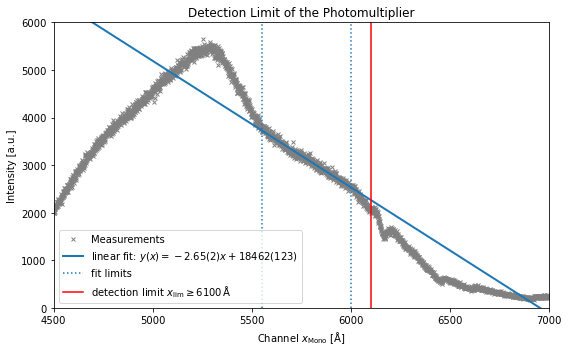

In [142]:
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(white_1['Channel'], white_1['Counts'], marker = 'x', lw=0, ms = 4, c='gray', label='Measurements')

x_min, x_max = 5550, 6000
a, b = np.where(white_1['Channel']>x_min)[0][0], np.where(white_1['Channel']<x_max)[0][-1]

def linear(x, a, b):
    return a * (x-x_min) + b


xfit = white_1['Channel'][a:b]
yfit = white_1['Counts'][a:b]

params, cov = sc.curve_fit(linear, xfit, yfit, p0=[1, 4000], maxfev = 10000)
u_params = np.sqrt(np.diagonal(cov))

print(params, u_params)

a = params[0]
b = params[1] - x_min*params[0]

u_a = u_params[0]
u_b = np.sqrt(u_params[1]**2 + (x_min*u_params[0])**2 - cov[0, 1]*x_min)

print(a, u_a)
print(b, u_b)

ax.plot(white_1['Channel'], linear(white_1['Channel'], *params), ls='-', c='C0', lw=2, label=r'linear fit: $y(x) = -2.65(2)x + 18462(123)\,$')

ax.axvline(x=x_min, c='C0', ls=':', label='fit limits')
ax.axvline(x=x_max, c='C0', ls=':')

ax.axvline(x=6100, c='red', ls='-', label=r'detection limit $x_\mathrm{lim}\geq 6100\,\mathrm{\AA}$', lw=1.5)

ax.set_xlim((4500, 7000))
ax.set_ylim((0, 6000))

ax.set_xlabel(r'Channel $x_\mathrm{Mono}$ [$\mathrm{\AA}$]')
ax.set_ylabel(r'Intensity [a.u.]')
ax.set_title(r'Detection Limit of the Photomultiplier')
ax.legend()
plt.tight_layout()
plt.savefig('detection_limit.pdf', dpi=600)
plt.show()